In [1]:
import numpy as np
import scipy.linalg
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv("data.csv")
df

,L,n,r
0,60,1,1.00
1,60,2,1.35
2,60,3,1.60
3,60,4,1.80
4,60,5,2.00
5,60,6,2.20
6,60,7,2.40
7,60,8,2.55
8,60,9,2.70
9,60,10,2.85


In [3]:
df6 = df[df.L == 60].sort_values('n', ascending=True)
df8 = df[df.L == 80].sort_values('n', ascending=True)
df10 = df[df.L == 100].sort_values('n', ascending=True)

In [4]:
df6['B'] = np.abs(df6.r.diff(periods=-1))
df8['B'] = np.abs(df8.r.diff(periods=-1))
df10['B'] = np.abs(df10.r.diff(periods=-1))

In [5]:
df6['Q'] = df6.r / (2*df.L)
df8['Q'] = df8.r / (2*df.L)
df10['Q'] = df10.r / (2*df.L)

In [6]:
df6['BQ'] = df6.B * df6.Q
df8['BQ'] = df8.B * df8.Q
df10['BQ'] = df10.B * df10.Q

df = pd.concat([df6, df8, df10])
df

,L,n,r,B,Q,BQ
0,60,1,1.00,0.35,0.008333,0.002917
1,60,2,1.35,0.25,0.011250,0.002813
2,60,3,1.60,0.20,0.013333,0.002667
3,60,4,1.80,0.20,0.015000,0.003000
4,60,5,2.00,0.20,0.016667,0.003333
5,60,6,2.20,0.20,0.018333,0.003667
6,60,7,2.40,0.15,0.020000,0.003000
7,60,8,2.55,0.15,0.021250,0.003188
8,60,9,2.70,0.15,0.022500,0.003375
9,60,10,2.85,NaN,0.023750,NaN


In [7]:
df.dropna(inplace=True)

basis = np.vstack((df.L, np.ones(len(df.L)))).T
koefs = scipy.linalg.lstsq(basis, df.BQ)[0]

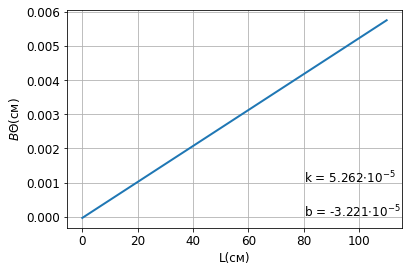

In [39]:
plt.grid()
plt.rc("font", size=12)

x = np.arange(0, 110, 0.1)
y = koefs[0] * x + koefs[1]

plt.ylabel(r"$B \Theta$(см)")
plt.xlabel("L(см)")

plt.text(80, 0.001, f"k = {np.round(koefs[0] * 10**5, 3)}" + r"$\cdot10^{-5}$")
plt.text(80, 0, f"b = {np.round(koefs[1] * 10**5, 3)}" + r"$\cdot10^{-5}$")

plt.plot(x, y, linewidth=2)
plt.savefig("report/assets/BQ(l).pdf", bbox_inches = "tight")

In [12]:
wave = 632.8 * 10**-7
h0 = 16.25 * 10**-1
n = h0 * k / wave
n

1.3511469453809055